# LSTM Long Short Term Memory


#### Using LSTM to predict the Google stock price, using daily stock price data from year 2012 to 2016. Building an LSTM to predict the stock price for Jan 2017 !!

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the LSTM

### Importing the Keras libraries and packages

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### Initialising the LSTM

In [8]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [13]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [22]:
regressor.fit(X_train, y_train, epochs = 150, batch_size = 32)

Epoch 1/150
38/38 [==============================] - 6s 163ms/step - loss: 0.0014
Epoch 2/150
38/38 [==============================] - 6s 158ms/step - loss: 0.0017
Epoch 3/150
38/38 [==============================] - 6s 151ms/step - loss: 0.0013
Epoch 4/150
38/38 [==============================] - 6s 166ms/step - loss: 0.0013
Epoch 5/150
38/38 [==============================] - 6s 166ms/step - loss: 0.0013
Epoch 6/150
38/38 [==============================] - 6s 169ms/step - loss: 0.0014 1s - lo
Epoch 7/150
38/38 [==============================] - 6s 155ms/step - loss: 0.0013
Epoch 8/150
38/38 [==============================] - 6s 166ms/step - loss: 0.0013 0s - loss: 
Epoch 9/150
38/38 [==============================] - 6s 165ms/step - loss: 0.0014
Epoch 10/150
38/38 [==============================] - 7s 172ms/step - loss: 0.0014
Epoch 11/150
38/38 [==============================] - 6s 166ms/step - loss: 0.0015
Epoch 12/150
38/38 [==============================] - 6s 165ms/step - loss: 

38/38 [==============================] - 6s 160ms/step - loss: 9.8028e-04
Epoch 98/150
38/38 [==============================] - 6s 145ms/step - loss: 9.2081e-04
Epoch 99/150
38/38 [==============================] - 7s 174ms/step - loss: 0.0011
Epoch 100/150
38/38 [==============================] - 6s 167ms/step - loss: 9.7525e-04
Epoch 101/150
38/38 [==============================] - 7s 172ms/step - loss: 0.0010ETA: 0s - loss: 0.00
Epoch 102/150
38/38 [==============================] - 6s 171ms/step - loss: 0.0012
Epoch 103/150
38/38 [==============================] - 7s 173ms/step - loss: 0.0010
Epoch 104/150
38/38 [==============================] - 7s 172ms/step - loss: 9.5891e-04
Epoch 105/150
38/38 [==============================] - 6s 161ms/step - loss: 9.8364e-04
Epoch 106/150
38/38 [==============================] - 4s 101ms/step - loss: 0.0012
Epoch 107/150
38/38 [==============================] - 3s 89ms/step - loss: 0.0012
Epoch 108/150
38/38 [==============================] 

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [23]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [24]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

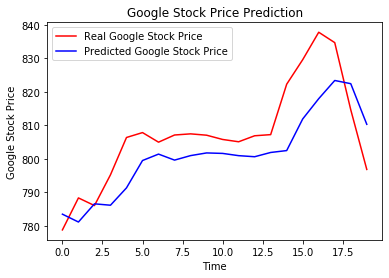

In [25]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()